In [1]:
# Все для визуализации
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

# Все для работы с данными
import numpy as np
import pandas as pd
import bdorch
import config

In [2]:
# Получаем данные 
df = pd.read_csv('data.csv')
df

,Возраст,Пол,В браке,Количество детей,Уровень образования,Доход в месяц,Тип занятости,Стаж на текущем месте работы (лет),Общий трудовой стаж (лет),Тип жилья,...,Частота смены места работы за последние 5 лет,"Наличие других займов (например, микрозаймы)",Наличие загранпаспорта,Частота поездок за границу за последние 5 лет,Наличие недвижимости кроме основного жилья,Оценка стоимости всего имущества,Уровень финансовой грамотности,Платеж по текущему кредиту в месяц,Количество сданных лаб по информатике,Дефолт
0,47,Женщина,Да,2,Колледж,79000,ООО,6,24,Ипотека,...,10,3,Нет,2,3,5965000,Высокий,21000,3,False
1,20,Женщина,Нет,6,Школа - 11,89000,ИП,0,1,Арендованное,...,3,10,Да,12,10,9143000,Средний,4000,3,False
2,33,Женщина,Нет,6,Колледж,121000,Нет работы,1,2,Арендованное,...,10,9,Нет,19,8,4899000,Средний,30000,4,False
3,60,Женщина,Нет,1,Школа - 11,106000,ИП,9,42,Арендованное,...,5,4,Нет,17,6,9208000,Низкий,98000,2,False
4,33,Мужчина,Да,1,Нет,88000,ИП,12,12,Арендованное,...,1,5,Да,18,10,7882000,Средний,22000,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,Мужчина,Да,4,Аспирант,102000,ООО,13,32,Арендованное,...,5,8,Нет,4,2,7593000,Высокий,61000,0,True
9996,23,Мужчина,Нет,2,Колледж,135000,ИП,1,4,Арендованное,...,3,6,Да,12,6,8887000,Средний,71000,2,True
9997,22,Женщина,Да,2,Нет,70000,ИП,1,3,Ипотека,...,9,9,Нет,18,5,11288000,Средний,50000,2,False
9998,34,Женщина,Да,0,Школа - 11,118000,Постоянная работа,3,7,Собственное,...,0,0,Нет,12,4,13918000,Низкий,68000,4,False


In [3]:
# Переводим в числовой формат

df = pd.get_dummies(df, columns=['Пол'])

yn_col = ["В браке", "Наличие автомобиля", "Наличие банковских вкладов", "Страхование жизни", "Наличие загранпаспорта"]

for i in yn_col:
    df[i] = df[i].map({'Нет': 0, 'Да': 1})

edu_levels = ['Нет',
              'Школа - 9',
              'Школа - 11',
              'Колледж',
              'Бакалавр',
              'Магистр / Спец',
              'Аспирант',
              'Доктор наук']

works = ['Нет работы', 'Самозанятый', 'ИП', 'Постоянная работа', 'ООО']

live = ["Арендованное", "Ипотека", "Собственное"]

finance = ["Низкий", "Средний", "Высокий"]

df['Уровень образования'] = df['Уровень образования'].map({edu_levels[i]: i for i in range(len(edu_levels))})
df['Тип занятости'] = df['Тип занятости'].map({works[i]: i for i in range(len(works))})
df['Тип жилья'] = df['Тип жилья'].map({live[i]: i for i in range(len(live))})
df['Уровень финансовой грамотности'] = df['Уровень финансовой грамотности'].map(
    {finance[i]: i for i in range(len(finance))})

df

,Возраст,В браке,Количество детей,Уровень образования,Доход в месяц,Тип занятости,Стаж на текущем месте работы (лет),Общий трудовой стаж (лет),Тип жилья,Наличие автомобиля,...,Наличие загранпаспорта,Частота поездок за границу за последние 5 лет,Наличие недвижимости кроме основного жилья,Оценка стоимости всего имущества,Уровень финансовой грамотности,Платеж по текущему кредиту в месяц,Количество сданных лаб по информатике,Дефолт,Пол_Женщина,Пол_Мужчина
0,47,1,2,3,79000,4,6,24,1,1,...,0,2,3,5965000,2,21000,3,False,True,False
1,20,0,6,2,89000,2,0,1,0,0,...,1,12,10,9143000,1,4000,3,False,True,False
2,33,0,6,3,121000,0,1,2,0,0,...,0,19,8,4899000,1,30000,4,False,True,False
3,60,0,1,2,106000,2,9,42,0,1,...,0,17,6,9208000,0,98000,2,False,True,False
4,33,1,1,0,88000,2,12,12,0,0,...,1,18,10,7882000,1,22000,4,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,1,4,6,102000,4,13,32,0,1,...,0,4,2,7593000,2,61000,0,True,False,True
9996,23,0,2,3,135000,2,1,4,0,1,...,1,12,6,8887000,1,71000,2,True,False,True
9997,22,1,2,0,70000,2,1,3,1,1,...,0,18,5,11288000,1,50000,2,False,True,False
9998,34,1,0,2,118000,3,3,7,2,0,...,0,12,4,13918000,0,68000,4,False,True,False


In [4]:
# Делим на train и test
train, test = bdorch.data_split(df)

x_train, y_train = bdorch.get_xy(train)
x_test, y_test = bdorch.get_xy(test)
x_train = bdorch.scale_data(x_train)
x_test = bdorch.scale_data(x_test)

In [5]:
# Создаем модель
model = bdorch.Perceptron()

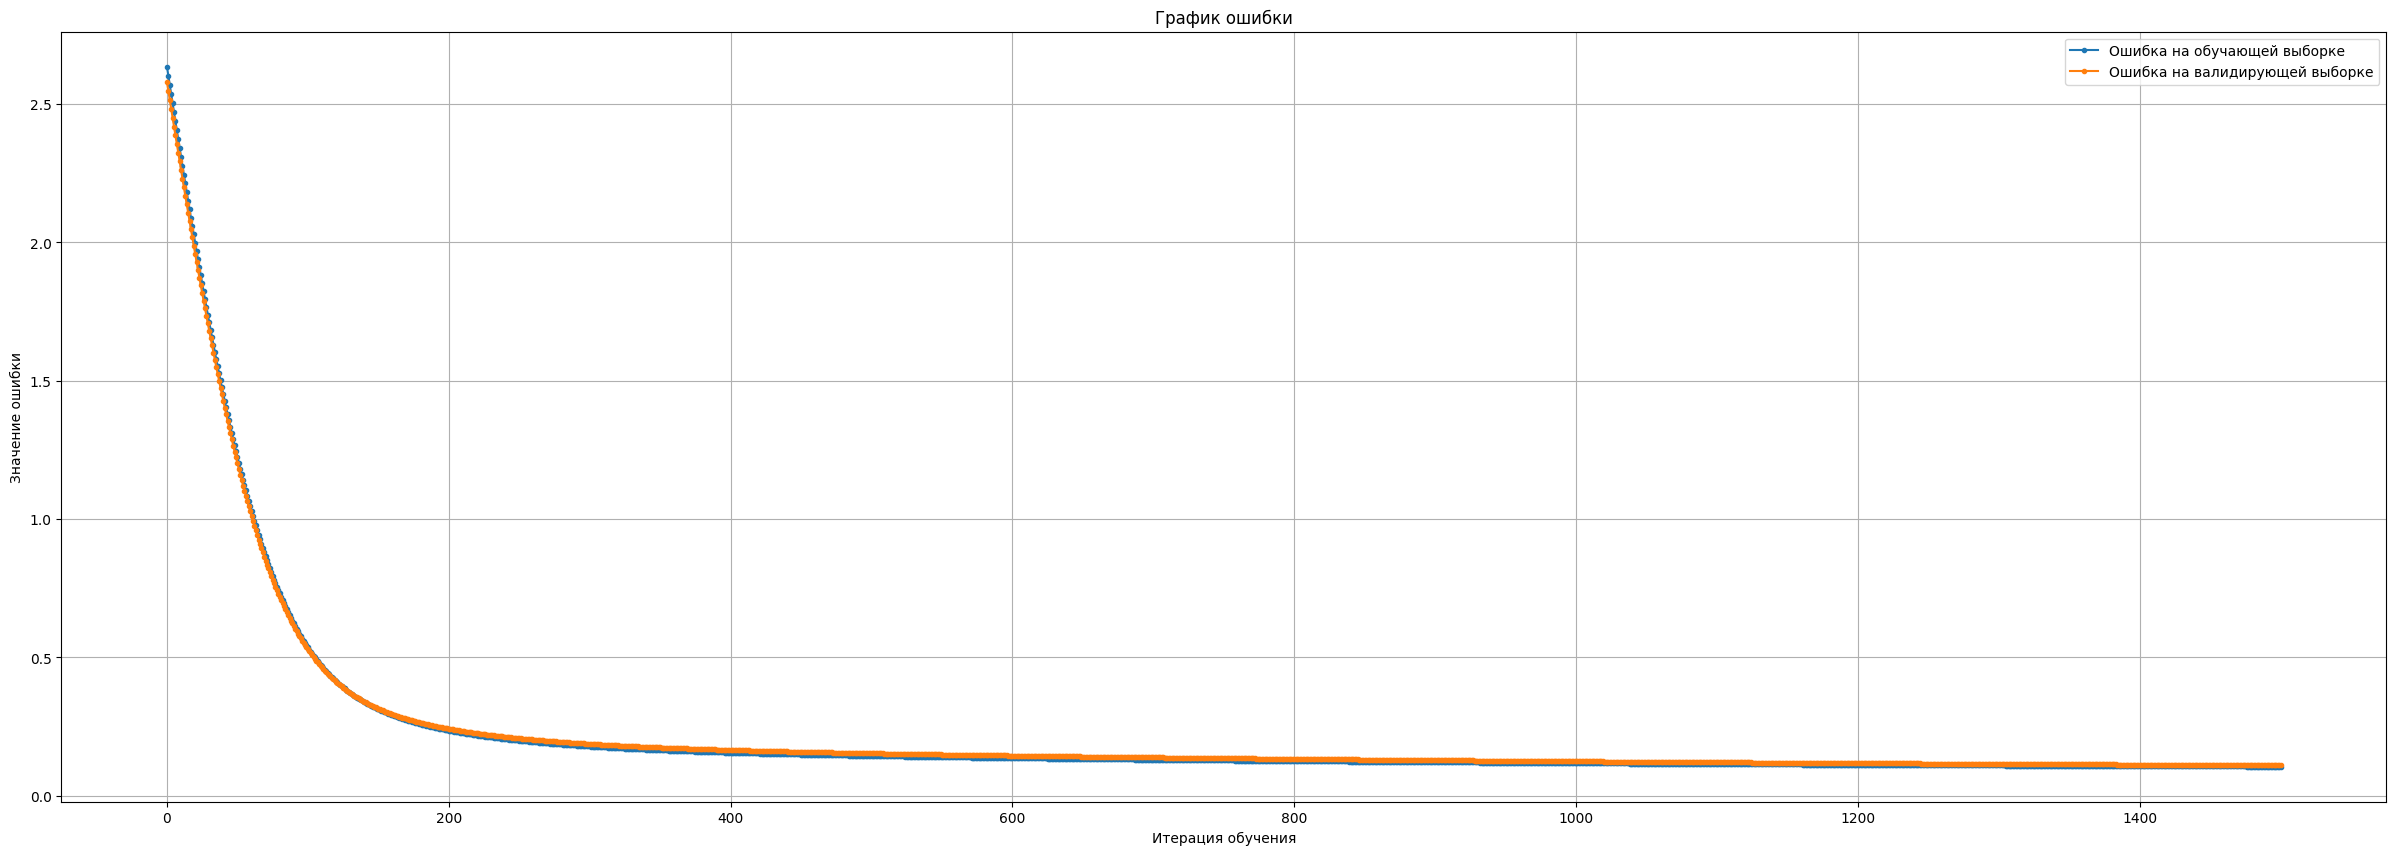

In [6]:
# Обучаем модель
losses = [] #ошибки на обучении
test_losses = [] # ошибки на валидации
for epoch in range(config.epochs + 1):
    y_pred = model(x_train) # Предсказываем У

    loss = bdorch.cross_entropy(y_train, y_pred) # Вычисляем функцию ошибки
  
    grad = np.array([[i] for i in bdorch.w_grad(x_train, y_train, y_pred)]) # Вычисляем градиенты
    
    model.w -= config.alpha * grad # меняем веса
    model.b -= config.alpha * bdorch.b_grad(y_train, y_pred) # Меняем сдвиг

    losses.append(loss.item()) # запоминаем ошибку
    test_losses.append(bdorch.cross_entropy(y_test, model(x_test))) # и еще одну
    if epoch % 100 == 0: #Визуализация
        clear_output(True)
        fig, ax = plt.subplots(figsize=(30, 10))
        plt.title("График ошибки")
        plt.plot(losses, ".-", label = "Ошибка на обучающей выборке")
        plt.plot(test_losses, ".-", label = "Ошибка на валидирующей выборке")
        plt.legend()

        plt.xlabel("Итерация обучения")
        plt.ylabel("Значение ошибки")
        plt.grid()
        plt.show()


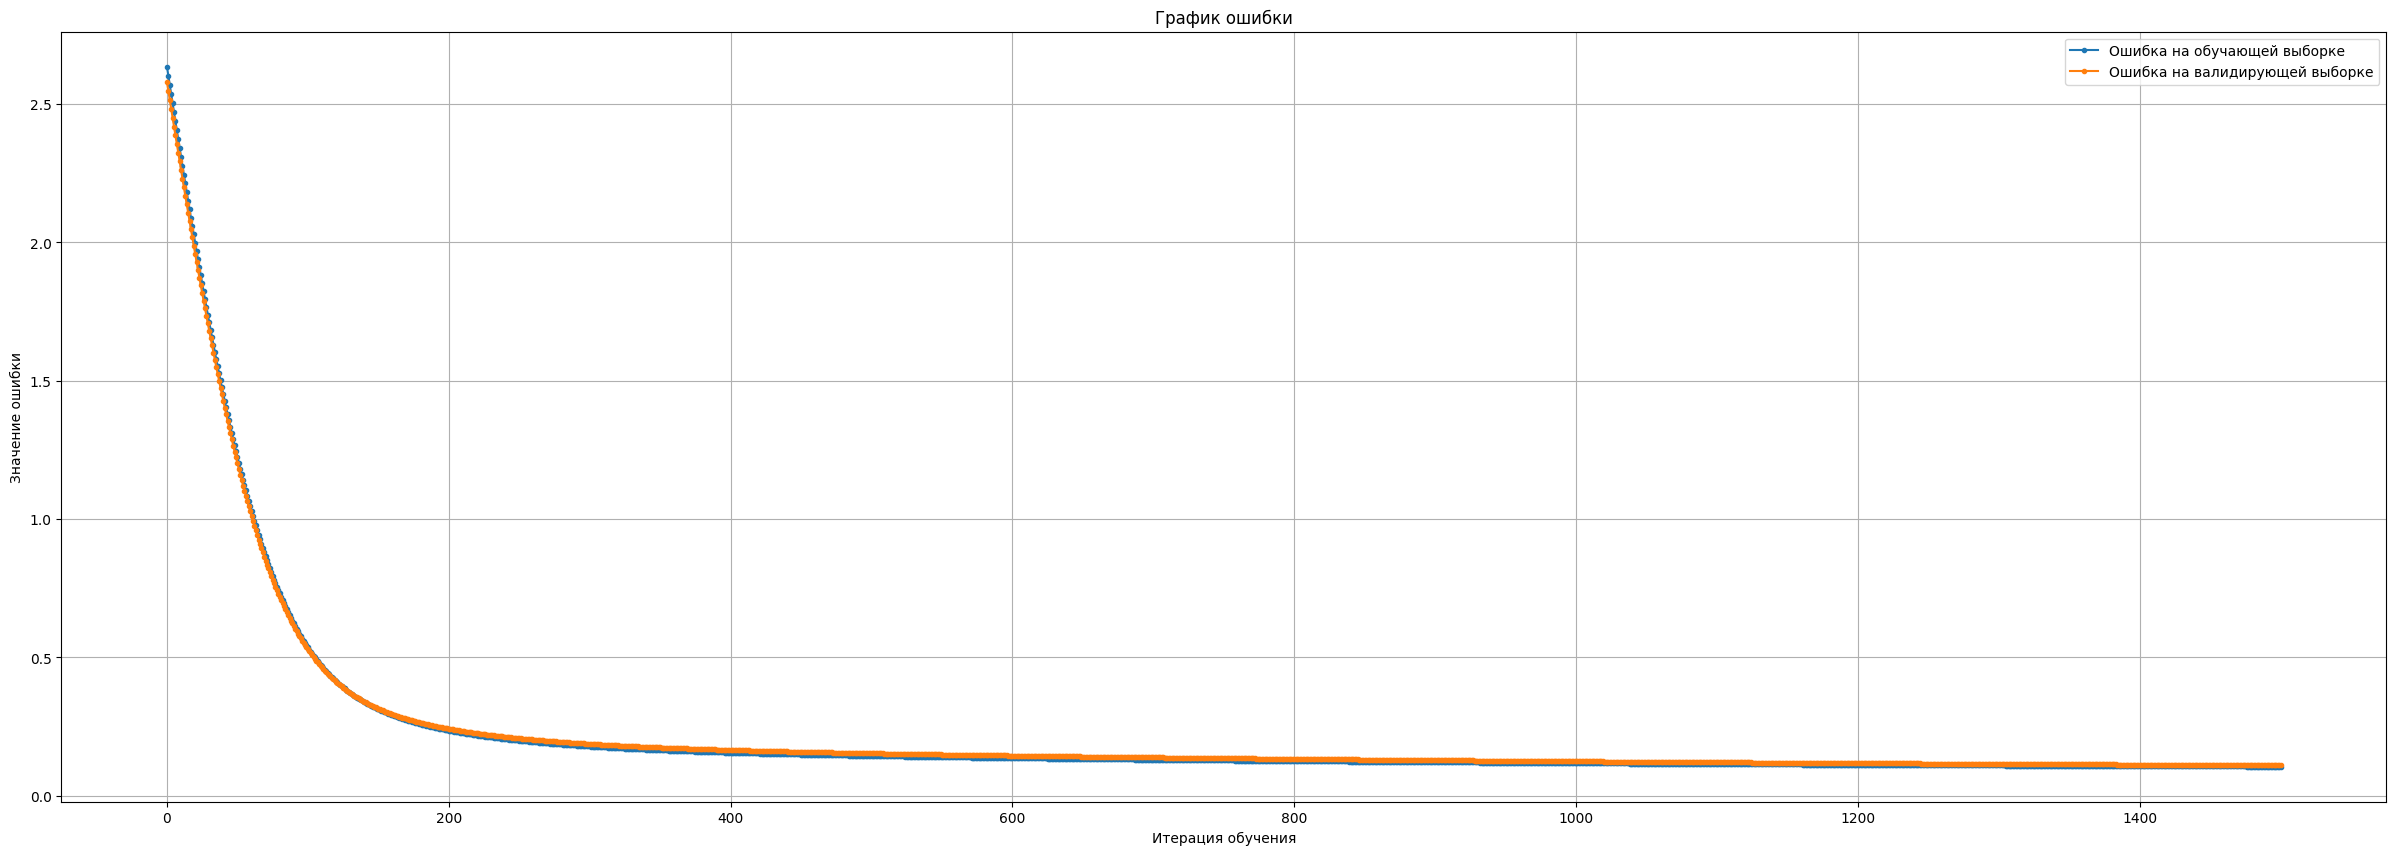

In [9]:
clear_output(True)
fig, ax = plt.subplots(figsize=(30, 10))
plt.title("График ошибки")
plt.plot(losses, ".-", label = "Ошибка на обучающей выборке")
plt.plot(test_losses, ".-", label = "Ошибка на валидирующей выборке")
plt.legend()

plt.xlabel("Итерация обучения")
plt.ylabel("Значение ошибки")
plt.grid()
plt.show()

In [11]:
print(f'Итоговая точность: {bdorch.get_acc(y_test, model(x_test)):.2f}%')

Итоговая точность: 95.60%
